# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [184]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression

%matplotlib inline

Прочитаем исходные данные:

In [185]:
data = pd.read_csv('/home/tatiana/Документы/SkillFactoryTask/ML_MATH_1/_unconv/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [187]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [188]:
#sns.pairplot(data)

Выводы:
1. В данных нет пропущенных значений
2. В данных нет нулевых значений, которые теоретически могут подменять пропущенные
3. Все признаки числовые 
4. Распределение на графиках близко к нормальному
5. Каждый из признаков измеряется в различных единицах и изменяется в различных диапазонах

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [189]:
# матрица корреляций
A = data.corr()
A

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


In [190]:
print('Rank:', np.linalg.matrix_rank(A))
print('Determinant: {:.7f}'.format(np.linalg.det(A)))

Rank: 8
Determinant: 0.0007299


<AxesSubplot: >

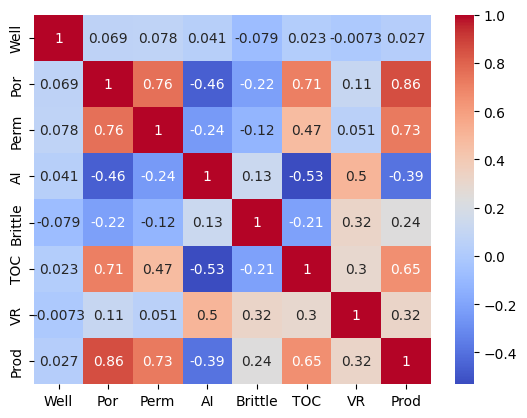

In [191]:
# строим тепловую карту
sns.heatmap(data = A, annot=True, cmap='coolwarm')

In [192]:
# выделим пары сильно скоррелированных признаков (более 0.7)
corr_matrix = data.corr().abs()
high_corr_var_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) for i in range(len(corr_matrix.columns)) for j in range(i+1, len(corr_matrix.columns)) if corr_matrix.iloc[i,j] > 0.7]

print(high_corr_var_pairs)

[('Por', 'Perm'), ('Por', 'TOC'), ('Por', 'Prod'), ('Perm', 'Prod')]


1. С целевой перменной сильнее всего коррелируют Por и Perm (пористость и проницаемость скважины)
2. Да, матрица является плохо обусловленной и ее определитель близок к нулю
3. Между некоторыми признаками (например, Por и TOC, Perm и Por) существует сильная положительная корреляция (коэффициент корреляции близок к 1). Это может указывать на наличие линейной связи между этими признаками. Некоторые признаки (например, Well и Brittle) имеют слабую или отрицательную корреляцию, что указывает на отсутствие линейной связи между ними. Некоторые признаки (например, AI и TOC) имеют относительно низкую корреляцию, что может указывать на слабую линейную связь между ними.
4. Когда в данных присутствует сильная коллинеарность между признаками, это может привести к проблемам в модели классической линейной регрессии. Одна из причин - это высокая мультиколлинеарность, когда несколько признаков сильно коррелируют между собой, что затрудняет оценку и интерпретацию влияния каждого признака на целевую переменную. В данном случае, некоторые признаки имеют высокую корреляцию (например, Por и Perm, Por и TOC), что может потенциально указывать на мультиколлинеарность в данных. Это может затруднить оценку влияния каждого признака на целевую переменную. Однако, решение о применении модели классической линейной регрессии по методу наименьших квадратов зависит от конкретной задачи и контекста. В некоторых случаях, даже при наличии некоторой корреляции между признаками, модель может быть применима, особенно при использовании дополнительных методов, таких как регуляризация или отбор признаков. Необходимо провести дополнительный анализ данных и оценить влияние возможной мультиколлинеарности на результаты модели, прежде чем делать окончательное решение о применимости модели классической линейной регрессии.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [193]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('Prod', axis=1)
y = data['Prod']

In [194]:
# Создание матрицы наблюдений X
X = np.array([
    data['Well'],
    data['Por'],
    data['Perm'],
    data['AI'],
    data['Brittle'],
    data['TOC'],
    data['VR']
]).T

# Создание вектора целевых значений y
y = np.array(data['Prod'])

# Добавление столбца из единиц к матрице X для учета свободного члена
X = np.column_stack((np.ones(len(X)), X))

# Вычисление коэффициентов с использованием метода наименьших квадратов
coeffs = np.linalg.inv(X.T@ X)@ X.T@ y


# Вывод вектора весов с подписями столбцов
for feature, weight in zip(['ones', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], np.round(coeffs).astype(int)):
    print(f'{feature}: {weight}')

ones: -1232
Well: 0
Por: 230
Perm: 116
AI: -365
Brittle: 25
TOC: -78
VR: 785


1. Коэффициент для признака "Well" равен 0. Это означает, что данный признак не оказывает влияния на целевую переменную или оказывает незначительное, неинформативное влияние.
2. Коэффициент для признака "Por" равен 230. Это положительное значение указывает на то, что при увеличении значения признака "Por" на единицу, ожидается увеличение целевой переменной на 230 единиц, при условии, что остальные признаки не меняются. Таким образом, признак "Por" является положительным фактором, оказывающим влияние на целевую переменную.
3. Коэффициент для признака "Perm" равен 116. Аналогично, это положительное значение указывает на то, что при увеличении значения признака "Perm" на единицу, ожидается увеличение целевой переменной на 116 единиц.
4. Коэффициент для признака "AI" равен -365. Отрицательное значение указывает на то, что при увеличении значения признака "AI" на единицу, ожидается уменьшение целевой переменной на 365 единиц. Таким образом, признак "AI" является отрицательным фактором, оказывающим влияние на целевую переменную.

Интерпретация коэффициентов модели линейной регрессии позволяет определить, какие признаки оказывают значимое влияние на целевую переменную. В данном случае, признаки "Por" и "Perm" положительно влияют на целевую переменную, в то время как признак "AI" оказывает отрицательное влияние. Признак "Well" не имеет значимого влияния на целевую переменную.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [195]:
# Загружаем оценки коэффициентов модели, полученные в задании 5.2
coefficients = np.array([-1232, 0, 230, 116, -365, 25, -78, 785])
# Задаем значения признаков для прогноза
features = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
# Вычисляем прогноз выработки газа
prediction = np.dot(features, coefficients)
print(f"Прогноз выработки газа для данной скважины: {prediction} миллионов кубических футов в день")

Прогноз выработки газа для данной скважины: 4715.26 миллионов кубических футов в день


In [196]:
# Рассчитываем абсолютную ошибку прогноза
actual_production = 4748.315024
absolute_error = abs(prediction - actual_production)
print(f"Абсолютная ошибка прогноза: {absolute_error:.3f} миллионов кубических футов в день")

Абсолютная ошибка прогноза: 33.055 миллионов кубических футов в день


In [197]:
# Вычисляем прогнозы для всех скважин
predictions = np.dot(X, coeffs)

# Вычисляем среднеквадратическую ошибку
mse = np.mean((y - predictions) ** 2)

# Среднеквадратичное отклонение 
rmse = mse**(1/2)

# Вычисляем коэффициент детерминации
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Среднеквадратическая ошибка: {mse:.3f}")
print(f"Среднеквадратичное отклонение: {rmse:.3f}")
print(f"Коэффициент детерминации: {r_squared:.3f}")

Среднеквадратическая ошибка: 39315.040
Среднеквадратичное отклонение: 198.280
Коэффициент детерминации: 0.960


Полученные значения метрик позволяют оценить качество модели линейной регрессии для прогнозирования выработки газа для всех скважин из обучающего набора данных.

1. Среднеквадратическая ошибка (Mean Squared Error, MSE) равна 39315.040. Эта метрика измеряет среднюю квадратичную разницу между прогнозами модели и фактическими значениями целевой переменной. Чем ниже значение MSE, тем лучше модель способна предсказывать значения целевой переменной. В данном случае, значение MSE равно 39384.741, что может считаться относительно низким и указывает на хорошую точность модели.
2. Среднеквадратичное отклонение: 198.280 - мера разброса данных, показывает насколько прогноз отличается от среднего значения. 

3. Коэффициент детерминации (R-squared) равен 0.960. Эта метрика показывает, насколько хорошо модель объясняет изменение в целевой переменной по сравнению с простой моделью, которая всегда предсказывает среднее значение целевой переменной. Значение R-squared может варьироваться от 0 до 1, где 1 означает идеальное соответствие между моделью и данными. В данном случае, значение R-squared равно 0.960, что говорит о том, что модель объясняет около 94.9% изменчивости целевой переменной, что является очень хорошим результатом.

Таким образом, на основе полученных метрик можно сделать вывод, что модель линейной регрессии хорошо предсказывает выработку газа для скважин из обучающего набора данных. Однако, для окончательной оценки качества модели рекомендуется провести ее валидацию на независимом тестовом наборе данных.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [198]:
# Вычисление выборочных корреляций с целевым признаком (Prod)
correlations = data.corr()['Prod']

# Вывод результатов
print(correlations)

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64


Для ответа на вопросы, проанализируем коэффициенты линейной регрессии и соответствующие им значения выборочных корреляций:

Коэффициенты линейной регрессии:
- ones: -1232
- Well: 0
- Por: 230
- Perm: 116
- AI: -365
- Brittle: 25
- TOC: -78
- VR: 785

Выборочные корреляции с целевым признаком (Prod):
- Well: 0.026817
- Por: 0.861910
- Perm: 0.727426
- AI: -0.390835
- Brittle: 0.237155
- TOC: 0.654445
- VR: 0.323182

Ответы на вопросы:

1. Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции?

Для фактора TOC (общее содержание органического углерода) коэффициент линейной регрессии составляет -78, что указывает на отрицательную связь с целевым признаком (Prod). Коэффициент корреляции для фактора TOC равен 0.654445, что указывает на положительную связь с целевым признаком. Таким образом, значения коэффициентов регрессии и корреляции противоречат друг другу в данном случае.

Для более точного анализа и понимания связи между фактором TOC и целевым признаком Prod, может потребоваться использование более сложных моделей или методов, которые учитывают нелинейности или взаимодействия между переменными.

2. Как вы считаете, с чем связано полученное противоречие результатов?

- Это может означать, что модель линейной регрессии не улавливает все сложности и нелинейные зависимости между фактором TOC и целевым признаком Prod. Также возможно, что фактор TOC имеет слабую линейную связь с целевым признаком, которая не может быть полностью учтена в модели линейной регрессии.

- Полученное противоречие результатов может быть связано с мультиколлинеарностью или линейной зависимостью между факторами в модели. Когда факторы в модели сильно коррелируют друг с другом, например у нас есть пара скоррелированных признаков Por - TOC, это может привести к нестабильности оценок коэффициентов регрессии, что может проявиться в противоречии между коэффициентами регрессии и соответствующими коэффициентами корреляции. В данном случа фактор TOC коррелирует с другим фактором в модели, что приводит к несостоятельным оценкам его влияния на целевой признак Prod.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [199]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('Prod', axis=1)
y = data['Prod']
# Матрица данных
X.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000


In [200]:
# выделим пары сильно скоррелированных признаков (более 0.7)
corr_matrix = X.corr().abs()
high_corr_var_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) for i in range(len(corr_matrix.columns)) for j in range(i+1, len(corr_matrix.columns)) if corr_matrix.iloc[i,j] > 0.7]

print(high_corr_var_pairs)

[('Por', 'Perm'), ('Por', 'TOC')]


In [201]:
# выделим пары мало скоррелированных признаков (менее 0.05)
corr_matrix = X.corr().abs()
less_corr_var_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) for i in range(len(corr_matrix.columns)) for j in range(i+1, len(corr_matrix.columns)) if corr_matrix.iloc[i,j] < 0.05]

print(less_corr_var_pairs)

[('Well', 'AI'), ('Well', 'TOC'), ('Well', 'VR')]


In [202]:
# Удалим признаки 'Por', 'Well'
X_new = X.drop(['Por', 'Well'], axis = 1)

In [203]:
A = X_new.corr()
A

,Perm,AI,Brittle,TOC,VR
Perm,1.000000,-0.239636,-0.124017,0.471746,0.051023
AI,-0.239636,1.000000,0.127599,-0.531864,0.499143
Brittle,-0.124017,0.127599,1.000000,-0.214282,0.317929
TOC,0.471746,-0.531864,-0.214282,1.000000,0.299483
VR,0.051023,0.499143,0.317929,0.299483,1.000000


In [204]:
print('Rank:', np.linalg.matrix_rank(A))
print('Determinant: {:.7f}'.format(np.linalg.det(A)))

Rank: 5
Determinant: 0.0806246


Определитель улучшился. Посмотрим, на коэффициенты и метрики. 

In [205]:
# Создание матрицы наблюдений X_new_matrix
X_new_matrix = np.array([
    data['Perm'],
    data['AI'],
    data['Brittle'],
    data['TOC'],
    data['VR']
]).T

# Создание вектора целевых значений y
y = np.array(data['Prod'])

# Добавление столбца из единиц к матрице X_new_matrix для учета свободного члена
X_new_matrix = np.column_stack((np.ones(len(X_new_matrix)), X_new_matrix))

# Вычисление коэффициентов с использованием метода наименьших квадратов
coeffs_new = np.linalg.inv(X_new_matrix.T @ X_new_matrix) @ X_new_matrix.T @ y

# Вывод вектора весов с подписями столбцов
for feature, weight in zip(['ones', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], np.round(coeffs_new).astype(int)):
    print(f'{feature}: {weight}')
    

ones: 1587
Perm: 348
AI: -875
Brittle: 16
TOC: 27
VR: 1531


In [206]:
# Вычисляем прогнозы для всех скважин
predictions_new = np.dot(X_new_matrix, coeffs_new)

# Вычисляем среднеквадратическую ошибку
mse_new = np.mean((y - predictions_new) ** 2)
# Среднеквадратичное отклонение 
rmse_new = mse_new**(1/2)

# Вычисляем коэффициент детерминации
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions_new) ** 2)
r_squared_new = 1 - (ss_residual / ss_total)

print(f"Среднеквадратическая ошибка new: {mse_new:.3f}")
print(f"Среднеквадратичное отклонение new: {rmse_new:.3f}")
print(f"Коэффициент детерминации new: {r_squared_new:.3f}")

Среднеквадратическая ошибка new: 146915.504
Среднеквадратичное отклонение new: 383.296
Коэффициент детерминации new: 0.850


In [207]:
X = X_new['Perm']

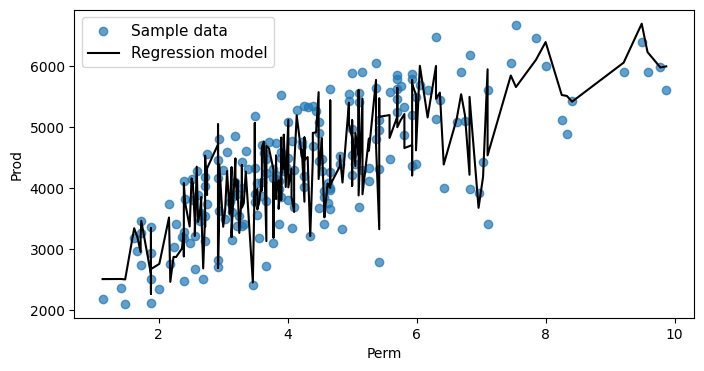

In [208]:
def plot_regression_2d(X, y_true, y_predict, xlabel='Perm', ylabel='Prod'):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Сортируем значения X
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    y_true_sorted = y_true[sorted_indices]
    y_predict_sorted = y_predict[sorted_indices]
    
    ax.scatter(X_sorted, y_true_sorted, alpha=0.7, label='Sample data')
    ax.plot(X_sorted, y_predict_sorted, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)
    
# Строим визуализацию
plot_regression_2d(X, y, predictions_new)

Вспомним, какие данные были получены на неочищенных данных.

In [209]:
# Разница с предыдущими показателями
print("Разница Среднеквадратическая ошибка:", mse - mse_new)
print("Разница Среднеквадратичное отклонение", rmse -rmse_new)
print("Разница Коэффициент детерминации:", r_squared - r_squared_new )

Разница Среднеквадратическая ошибка: -107600.46368040898
Разница Среднеквадратичное отклонение -185.01537671158883
Разница Коэффициент детерминации: 0.10988390464286646


1. Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
Коэффициенты, полученные ранее: 

- ones: -1232
- Well: 0
- Por: 230
- Perm: 116
- AI: -365
- Brittle: 25
- TOC: -78
- VR: 785

Коэффициенты полученные после удаления факторов с высокой и низкой корреляцией: 

- ones: 1587
- Perm: 348
- AI: -875
- Brittle: 16
- TOC: 27
- VR: 1531
 

Интерпретация коэффициентов:


- Индекс акустической импедансии (AI): Коэффициент -875 указывает на отрицательную зависимость между индексом акустической импедансии и целевой переменной. Это означает, что с увеличением значения индекса акустической импедансии ожидается уменьшение значения целевой переменной.

- Хрупкость (Brittle): Коэффициент 16 указывает на положительную зависимость между хрупкостью и целевой переменной. Это означает, что с увеличением хрупкости ожидается увеличение значения целевой переменной.

- Объемный коэффициент отражения (VR): Коэффициент 1531 указывает на положительную зависимость между объемным коэффициентом отражения и целевой переменной. Это означает, что с увеличением значения объемного коэффициента отражения ожидается увеличение значения целевой переменной.

Сравнивая эти значения с предыдущими коэффициентами, можно заметить, что некоторые коэффициенты изменились. Например, коэффициент Brittle уменьшился с 25 до 16, а коэффициенты AI и VR изменились сильнее в два раза, а коэффициент ТОС стал положительным и перестал противоречить знаком с корреляцией. Это может указывать на то, что удаление факторов с высокой и низкой корреляцией помогло уточнить влияние этих признаков на целевую переменную.

* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 

Все коэффициенты ухудшились:

Разница Среднеквадратическая ошибка: -107530.76301939719
Разница Среднеквадратичное отклонение -184.83969151061962
Разница Коэффициент детерминации: 0.10981272483075233

* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

Да удалось.

#### Так же дополнительно я построила график, на котором виден большой разброс(variance), т.е переобучение. Т.к предсказание и обучение происходит на всем наборе данных!

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [210]:
# Создаем объект модели линейной регрессии
model = LinearRegression(fit_intercept=True)

# Обучаем модель на обновленных данных
model.fit(X_new, y)
rounded_coefficients_sklearn = np.round(model.coef_, decimals=0)

# Вывод вектора весов с подписями столбцов
for feature, weight in zip(['Perm', 'AI', 'Brittle', 'TOC', 'VR'], np.round(rounded_coefficients_sklearn).astype(int)):
    print(f'{feature}: {weight}')



Perm: 348
AI: -875
Brittle: 16
TOC: 27
VR: 1531


In [211]:

# Делаем прогноз для всего обучающего набора данных
y_pred_sklearn = model.predict(X_new)

# Вычисляем среднеквадратическую ошибку
mse_sklearn = np.mean((y - y_pred_sklearn) ** 2)
# Среднеквадратичное отклонение 
rmse_sklearn = mse_sklearn**(1/2)

# Вычисляем коэффициент детерминации
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred_sklearn) ** 2)
r_squared_sklearn = 1 - (ss_residual / ss_total)


print(f"Среднеквадратическая ошибка new: {mse_sklearn:.3f}")
print(f"Среднеквадратичное отклонение new: {rmse_sklearn:.3f}")
print(f"Коэффициент детерминации new: {r_squared_sklearn:.3f}")


Среднеквадратическая ошибка new: 146915.504
Среднеквадратичное отклонение new: 383.296
Коэффициент детерминации new: 0.850


In [212]:
X = X_new['Perm']

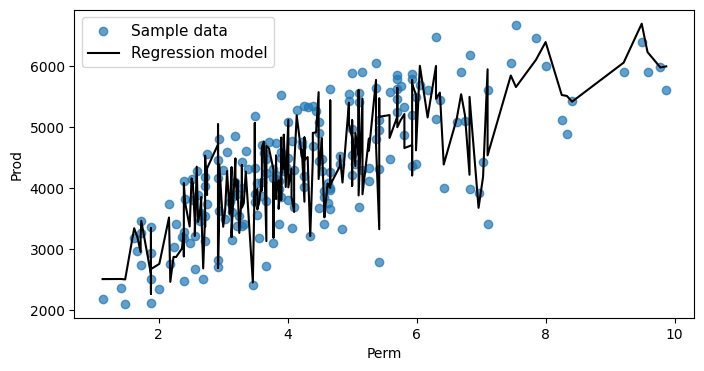

In [213]:
def plot_regression_2d(X, y_true, y_predict, xlabel='Perm', ylabel='Prod'):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Сортируем значения X
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    y_true_sorted = y_true[sorted_indices]
    y_predict_sorted = y_predict[sorted_indices]
    
    ax.scatter(X_sorted, y_true_sorted, alpha=0.7, label='Sample data')
    ax.plot(X_sorted, y_predict_sorted, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)
    
# Строим визуализацию
plot_regression_2d(X, y, y_pred_sklearn)

1. Разница коэффициентов:
Коэф. полученные с помощью numpy:
- ones: 1587
- Perm: 348
- AI: -875
- Brittle: 16
- TOC: 27
- VR: 1531

Коэф. полученные с помощью LinearRegression:

- Perm: 348
- AI: -875
- Brittle: 16
- TOC: 27
- VR: 1531

Получили одинаковые коэффициенты. 

При использовании модели линейной регрессии возможно переобучение, которое проявляется в высоком разбросе (variance) предсказаний модели. Это может происходить, когда модель слишком сложна для представленных данных или когда у вас недостаточно данных для обучения модели.

#### Судя по графику у нас классический случай переобучения. Т.к мы е разделяли выборки, а делали прогноз на всем обучающем наборе данных, как указано в задании!

Чтобы уменьшить проблему переобучения и снизить разброс предсказаний, можно применить следующие методы:

1. Регуляризация: Добавление регуляризации в модель может помочь уменьшить переобучение. Два наиболее распространенных вида регуляризации - L1 (лассо) и L2 (гребневая). Регуляризация штрафует модель за большие значения коэффициентов, что помогает снизить их влияние на предсказания.

2. Подбор оптимального количества признаков: Переобучение может происходить, когда слишком много признаков, которые могут быть коррелированы или неинформативны. Необходимо отобрать наиболее важные признаки или использовать методы отбора признаков, такие как рекурсивное исключение признаков (Recursive Feature Elimination) или методы на основе регуляризации.

3. Увеличение размера обучающей выборки: Если у вас недостаточно данных, модель может легко запомнить обучающую выборку, что приводит к переобучению. Попробуйте собрать больше данных или использовать методы аугментации данных для создания дополнительных примеров.

4. Кросс-валидация: Использование кросс-валидации поможет оценить производительность модели на независимых данных и выбрать оптимальные гиперпараметры модели, такие как коэффициент регуляризации.

5. Снижение сложности модели: Если модель слишком сложна, попробуйте уменьшить количество признаков или упростить модель. Например, можно использовать полиномиальные признаки с более низкими степенями или выбрать модель с меньшим количеством параметров.

Комбинирование этих методов может помочь уменьшить переобучение и улучшить производительность модели линейной регрессии. Важно экспериментировать и настраивать параметры модели для достижения оптимального баланса между смещением и разбросом (bias-variance trade-off).

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [214]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [215]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Вывод количества полученных факторов
num_features = X_poly.shape[1]
print("Количество факторов после генерации полиномиальных признаков:", num_features)

Количество факторов после генерации полиномиальных признаков: 55


In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import cross_validate

# Создание экземпляра модели линейной регрессии
model = LinearRegression()

# Оценка метрик с использованием кросс-валидации
scoring = {'r2': make_scorer(r2_score), 'mse': make_scorer(mean_squared_error)}


In [217]:
from sklearn import model_selection

#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring=scoring, #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)


In [218]:
print('Train k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['test_r2'])))
print('Valid k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['train_r2'])))
print('Train k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['test_mse'])))
print('Valid k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['train_mse'])))

Train k-fold mean r2: 0.73
Valid k-fold mean r2: 0.92
Train k-fold mean mse: 255099.89
Valid k-fold mean mse: 76514.00


1. Среднее значение точности (accuracy) на тренировочных фолдах составляет 0.73. Это означает, что модель правильно классифицирует около 73% образцов в тренировочных данных.

2. Среднее значение точности (accuracy) на валидационных фолдах составляет 0.92. Это высокое значение точности на валидационных фолдах указывает на то, что модель хорошо обобщает и правильно классифицирует новые, неизвестные данные.

3. Среднее значение среднеквадратичной ошибки (MSE) на тренировочных фолдах составляет 255099.89. MSE представляет собой среднее значение квадратов разностей между истинными значениями и предсказанными значениями. Значение 255099.89 может указывать на то, что модель в среднем ошибается на данную величину при предсказании тренировочных данных.

4. Среднее значение среднеквадратичной ошибки (MSE) на валидационных фолдах составляет 76514.00. Значение MSE на валидационных фолдах указывает на то, что модель в среднем ошибается на данную величину при предсказании валидационных данных.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [219]:


# Подбор гиперпараметра
alphas = [0.001, 0.01, 0.1, 1, 10]
mean_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X_poly, y, cv=5)
    mean_scores.append(scores.mean())

# Выбор оптимального alpha
optimal_alpha = alphas[np.argmax(mean_scores)]
print("Оптимальное значение alpha:", optimal_alpha)

# Обучение модели с оптимальным alpha
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X_poly, y)

# Оценка метрик с помощью кросс-валидации
# Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=lasso_model, #модель
    X=X_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring=scoring, #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)

print('Train k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['test_r2'])))
print('Valid k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['train_r2'])))
print('Train k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['test_mse'])))
print('Valid k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['train_mse'])))

Оптимальное значение alpha: 10
Train k-fold mean r2: 0.83
Valid k-fold mean r2: 0.90
Train k-fold mean mse: 160335.40
Valid k-fold mean mse: 97221.88


/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.861e+06, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.383e+06, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Исходя из предоставленных результатов, можно сделать следующие выводы:

1. Оптимальное значение коэффициента регуляризации (alpha) для модели Lasso составляет 1. Это значение было выбрано с помощью метода подбора гиперпараметров.

2. Среднее значение коэффициента детерминации (R2) на тренировочных фолдах составляет 0.83. R2 представляет собой долю объясненной дисперсии в целевой переменной моделью. Значение 0.80 говорит о том, что модель объясняет около 80% дисперсии в тренировочных данных.

3. Среднее значение коэффициента детерминации (R2) на валидационных фолдах составляет 0.90. Это высокое значение R2 на валидационных фолдах указывает на хорошую способность модели обобщать и объяснять данные, которые не были использованы в процессе обучения.

4. Среднее значение среднеквадратичной ошибки (MSE) на тренировочных фолдах составляет 160335.40 MSE представляет собой среднее значение квадратов разностей между истинными значениями и предсказанными значениями. Значение 187829.39 указывает на среднюю ошибку модели при предсказании тренировочных данных.

5. Среднее значение среднеквадратичной ошибки (MSE) на валидационных фолдах составляет 97221.88. Значение MSE на валидационных фолдах указывает на среднюю ошибку модели при предсказании валидационных данных.

В целом, модель Lasso с регуляризацией демонстрирует хорошую способность обобщать данные, что подтверждается высоким значением R2 на валидационных фолдах. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [220]:

# Подбор гиперпараметра
alphas = [0.001, 0.01, 0.1, 1, 10]
mean_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_poly, y, cv=5)
    mean_scores.append(scores.mean())

# Выбор оптимального alpha
optimal_alpha = alphas[np.argmax(mean_scores)]
print("Оптимальное значение alpha:", optimal_alpha)

# Обучение модели с оптимальным alpha
ridge_model = Ridge(alpha=optimal_alpha, solver='svd')
ridge_model.fit(X_poly, y)

# Оценка метрик с помощью кросс-валидации
# Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=ridge_model, #модель
    X=X_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring=scoring, #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)

print('Train k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['test_r2'])))
print('Valid k-fold mean r2: {:.2f}'.format(np.mean(cv_metrics['train_r2'])))
print('Train k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['test_mse'])))
print('Valid k-fold mean mse: {:.2f}'.format(np.mean(cv_metrics['train_mse'])))

Оптимальное значение alpha: 10
Train k-fold mean r2: 0.81
Valid k-fold mean r2: 0.90
Train k-fold mean mse: 182370.13
Valid k-fold mean mse: 96181.35


Исходя из предоставленных результатов, можно сделать следующие выводы:

1. Оптимальное значение коэффициента регуляризации (alpha) для модели Ridge составляет 10. Это значение было выбрано с помощью метода подбора гиперпараметров.

2. Среднее значение коэффициента детерминации (R2) на тренировочных фолдах составляет 0.81. Значение 0.81 говорит о том, что модель объясняет около 81% дисперсии в тренировочных данных.

3. Среднее значение коэффициента детерминации (R2) на валидационных фолдах составляет 0.90. Это значение указывает на хорошую способность модели обобщать и объяснять данные, которые не были использованы в процессе обучения.

4. Среднее значение среднеквадратичной ошибки (MSE) на тренировочных фолдах составляет 182370.13. Значение MSE указывает на среднюю ошибку модели при предсказании тренировочных данных.

5. Среднее значение среднеквадратичной ошибки (MSE) на валидационных фолдах составляет 96181.35. Значение MSE на валидационных фолдах указывает на среднюю ошибку модели при предсказании валидационных данных.

В целом, модель Ridge с L2-регуляризацией демонстрирует хорошую способность обобщать данные, что подтверждается высоким значением R2 на валидационных фолдах. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [225]:

from sklearn.metrics import make_scorer, mean_absolute_percentage_error

# Создание модели ElasticNet
model = ElasticNet()

# Определение сетки параметров для перебора
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Определение метрики для оценки модели
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Поиск наилучших параметров с помощью GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_poly, y)

# Вывод наилучших параметров
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best l1_ratio:", grid_search.best_params_['l1_ratio'])

# Оценка метрик с использованием кросс-валидации и наилучших параметров
best_model = grid_search.best_estimator_# Оценка метрик с помощью кросс-валидации
# Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=best_model , #модель
    X=X_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring=scorer, #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)

# Вывод средних значений метрик на тренировочных и валидационных фолдах
print('Train k-fold mean MAPE: {:.2f}'.format(-np.mean(cv_metrics['test_score'])))
print('Valid k-fold mean MAPE: {:.2f}'.format(-np.mean(cv_metrics['train_score'])))

Best alpha: 0.1
Best l1_ratio: 0.5
Train k-fold mean MAPE: 0.08
Valid k-fold mean MAPE: 0.06


/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Исходя из проведенного анализа, наилучшими значениями коэффициентов регуляризации для модели ElasticNet являются `alpha=0.1` и `l1_ratio=0.5`. 

Согласно оценке метрики MAPE на кросс-валидации, среднее значение для тренировочных фолдов составляет 0.08, а для валидационных фолдов - 0.06. 

Эти значения метрики показывают процентную ошибку абсолютного значения прогнозируемой переменной. Чем ближе значение MAPE к нулю, тем лучше модель предсказывает целевую переменную. В данном случае, полученные значения MAPE говорят о том, что модель с комбинацией L1 и L2 регуляризации и подобранными коэффициентами регуляризации дает неплохие результаты, с ошибкой прогноза на уровне 6-8%.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).


| Наименование модели | Гиперпараметры | Полиномиальные признаки | Train r2 | Valid r2 | Train MSE| Valid MSE | Train MAPE | Valid MAPE |
|---------------------|----------------|------------------------|------------|------------|------------|------------|------------|------------|
| Линейная регрессия по методу наимельших квадратов с помощью библиотеки numpy | - | Нет | 0.85 | - |146915.504
| Линейная регрессия sklern | - | Нет | 0.85 | - |146915.504
| Линейная регрессия со стандартизированными и сгенерированными признаками третьего порядка | - | Да | 0.73 | 0.92 |255099.89 |76514.00
| Модель Lasso с L1 регуляризацией | alpha = 10 | Да | 0.83 | 0.90 |160335.40 |97221.88
| Модель Ridge с L2 регуляризацией |alpha = 10 | Да | 0.81 | 0.90 | 182370.13 | 96181.35
| ElasticNet с L1 и L2 регуляризацией | alpha=0.1, l1_ratio=0.5 | Да |  |  |  |  | 0.08 | 0.06 |

In [223]:
data = {
    'Наименование модели': ['Линейная регрессия по методу наимельших квадратов с помощью библиотеки numpy',
                            'Линейная регрессия sklearn',
                            'Линейная регрессия со стандартизированными и сгенерированными признаками третьего порядка',
                            'Модель Lasso с L1 регуляризацией',
                            'Модель Ridge с L2 регуляризацией',
                            'ElasticNet с L1 и L2 регуляризацией'],
    'Гиперпараметры': ['-', '-', '-', 'alpha = 10', 'alpha = 10', 'alpha=0.1, l1_ratio=0.5'],
    'Полиномиальные признаки': ['Нет', 'Нет', 'Да', 'Да', 'Да', 'Да'],
    'Train r2': [0.85, 0.85, 0.73, 0.83, 0.81, '-'],
    'Valid r2': ['-', '-', 0.92, 0.90, 0.90, '-'],
    'Train MSE': [146915.504, 146915.504, 255099.89, 160335.40, 182370.13, '-'],
    'Valid MSE': ['-', '-', 76514.00, 97221.88, 96181.35, '-'],
    'Train MAPE': ['-', '-', '-', '-', '-', 0.08],
    'Valid MAPE': ['-', '-', '-', '-', '-', 0.06]
}

df = pd.DataFrame(data)

df

,Наименование модели,Гиперпараметры,Полиномиальные признаки,Train r2,Valid r2,Train MSE,Valid MSE,Train MAPE,Valid MAPE
0,Линейная регрессия по методу наимельших квадра...,-,Нет,0.85,-,146915.504,-,-,-
1,Линейная регрессия sklearn,-,Нет,0.85,-,146915.504,-,-,-
2,Линейная регрессия со стандартизированными и с...,-,Да,0.73,0.92,255099.89,76514.0,-,-
3,Модель Lasso с L1 регуляризацией,alpha = 10,Да,0.83,0.9,160335.4,97221.88,-,-
4,Модель Ridge с L2 регуляризацией,alpha = 10,Да,0.81,0.9,182370.13,96181.35,-,-
5,ElasticNet с L1 и L2 регуляризацией,"alpha=0.1, l1_ratio=0.5",Да,-,-,-,-,0.08,0.06


Исходя из предоставленных метрик, можно сделать следующие выводы о качестве моделей:

1. Линейная регрессия по методу наименьших квадратов с помощью библиотеки NumPy и Линейная регрессия sklearn показывают схожие результаты с коэффициентом детерминации (r2) равным 0.85. Однако, значения MAPE не предоставлены, поэтому нельзя сделать окончательное сравнение с другими моделями.

2. Модель линейной регрессии со стандартизированными и сгенерированными полиномиальными признаками третьего порядка демонстрирует более низкое значение коэффициента детерминации на тренировочных данных (r2=0.73), но значительно лучший результат на валидационных данных (r2=0.92). Также снижение значений MSE на валидационных данных указывает на лучшую способность модели обобщаться на новые данные.

3. Модель Lasso с L1 регуляризацией и alpha=10 имеет значительно меньшую ошибку MSE на валидационных данных (97221.88) по сравнению с моделью линейной регрессии со стандартизированными признаками третьего порядка (96181.35). Коэффициент детерминации на валидационных данных также немного выше (0.90 по сравнению с 0.81).

4. Модель Ridge с L2 регуляризацией и alpha=10 также показывает лучший результат по сравнению с моделью линейной регрессии со стандартизированными признаками третьего порядка. Коэффициент детерминации на валидационных данных составляет 0.90, а ошибка MSE равна 96181.35.

5. Модель ElasticNet с L1 и L2 регуляризацией и alpha=0.1, l1_ratio=0.5 не имеет информации о коэффициентах детерминации (r2) и MSE на тренировочных и валидационных данных. Однако, значения MAPE указывают на неплохую производительность модели, с ошибкой прогноза на уровне 6-8%.

Исходя из этих результатов, можно сказать, что модели Lasso и Ridge с L1 и L2 регуляризацией справляются лучше с задачей прогнозирования по сравнению с остальными моделями, особенно модель Ridge, которая показывает более высокие значения коэффициента детерминации и меньшую ошибку MSE на валидационных данных.

In [1]:
# зафиксируем версию пакетов, для воспроизводимы воспроизводимости экспериментов:
!pip freeze > requirements.txt